### Import Libraries and Load Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./data/HiCi - Africa Food Export.csv"
df = pd.read_csv(file_path, skiprows=3)

df.head()



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
1,NaN,NaN,NaN,NaN,NaN,meat and meat products (other than poultry),5/8/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
2,NaN,NaN,NaN,NaN,NaN,meat and meat products (other than poultry),24/8/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
3,NaN,NaN,NaN,NaN,NaN,meat and meat products (other than poultry),24/9/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
4,NaN,NaN,NaN,NaN,NaN,meat and meat products (other than poultry),11/6/2001,information,NaN,Norway,import not authorised,NaN,undecided,Botswana


### Data Cleanup and Preparing

##### Trim unnecessary columns and Promote Headers

In [2]:
# Trim unnecessary columns and reset index
df = df.iloc[:, 5:].reset_index(drop=True)

# Rename columns for clarity
df.columns = [
    "Product Category", "Year", "Notification Type", "Risk", "Notified By",
    "Action Taken", "Distribution Status", "Risk Decision", "Country of Origin"
]


df.head()

,Product Category,Year,Notification Type,Risk,Notified By,Action Taken,Distribution Status,Risk Decision,Country of Origin
0,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
1,meat and meat products (other than poultry),5/8/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
2,meat and meat products (other than poultry),24/8/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
3,meat and meat products (other than poultry),24/9/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
4,meat and meat products (other than poultry),11/6/2001,information,NaN,Norway,import not authorised,NaN,undecided,Botswana


##### Extract Year in Year Column and Remove matching Header

In [3]:
# Remove rows where values match column names
df = df[~df.apply(lambda row: any(row[col] == col for col in df.columns), axis=1)]

# Convert to datetime format and extract the year
df['Year'] = pd.to_datetime(df['Year'], format='%d/%m/%Y', errors='coerce').dt.year
df.head()

,Product Category,Year,Notification Type,Risk,Notified By,Action Taken,Distribution Status,Risk Decision,Country of Origin
1,meat and meat products (other than poultry),1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
2,meat and meat products (other than poultry),1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
3,meat and meat products (other than poultry),1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
4,meat and meat products (other than poultry),2001,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
5,meat and meat products (other than poultry),2001,information,NaN,Norway,import not authorised,NaN,undecided,Botswana


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 1 to 513
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Category     513 non-null    object
 1   Year                 513 non-null    int32 
 2   Notification Type    513 non-null    object
 3   Risk                 466 non-null    object
 4   Notified By          513 non-null    object
 5   Action Taken         475 non-null    object
 6   Distribution Status  446 non-null    object
 7   Risk Decision        513 non-null    object
 8   Country of Origin    513 non-null    object
dtypes: int32(1), object(8)
memory usage: 38.1+ KB


##### Handle Duplicate Rows

In [5]:
# Drop duplicate rows (if any)
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 1 to 513
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Category     230 non-null    object
 1   Year                 230 non-null    int32 
 2   Notification Type    230 non-null    object
 3   Risk                 198 non-null    object
 4   Notified By          230 non-null    object
 5   Action Taken         212 non-null    object
 6   Distribution Status  179 non-null    object
 7   Risk Decision        230 non-null    object
 8   Country of Origin    230 non-null    object
dtypes: int32(1), object(8)
memory usage: 17.1+ KB


##### Handle Missing Values

In [6]:
# Handling missing values
# - Drop rows where 'Product Category', 'Notified By', or 'Country of Origin' are missing (since they are crucial for analysis)
df = df.dropna(subset=["Product Category", "Notified By", "Country of Origin"])

# - Fill missing values in categorical columns with 'Unknown'
categorical_cols = ["Notification Type", "Risk", "Action Taken", "Distribution Status", "Risk Decision"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 1 to 513
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Category     230 non-null    object
 1   Year                 230 non-null    int32 
 2   Notification Type    230 non-null    object
 3   Risk                 230 non-null    object
 4   Notified By          230 non-null    object
 5   Action Taken         230 non-null    object
 6   Distribution Status  230 non-null    object
 7   Risk Decision        230 non-null    object
 8   Country of Origin    230 non-null    object
dtypes: int32(1), object(8)
memory usage: 17.1+ KB


In [7]:
df.head()

,Product Category,Year,Notification Type,Risk,Notified By,Action Taken,Distribution Status,Risk Decision,Country of Origin
1,meat and meat products (other than poultry),1999,information,Unknown,Norway,import not authorised,Unknown,undecided,Botswana
4,meat and meat products (other than poultry),2001,information,Unknown,Norway,import not authorised,Unknown,undecided,Botswana
8,meat and meat products (other than poultry),2002,information,Unknown,Norway,import not authorised,Unknown,undecided,Botswana
11,meat and meat products (other than poultry),2003,information,Unknown,Norway,import not authorised,Unknown,undecided,Botswana
12,meat and meat products (other than poultry),2003,information,border control - consignment detained,Norway,re-dispatch,Unknown,undecided,Botswana


### Data Analysis

##### 1. Pivot Table of Food Exported to the EU

In [ ]:
# Define year range bins and labels
bins = [1998, 2000, 2005, 2010, 2015, 2020]
labels = ["1999 - 2000", "2001 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020"]
df["Year Range"] = pd.cut(df["Year"], bins=bins, labels=labels, right=True)

# Create a pivot table aggregating values of country of origin and total values of product category
pivot_table = df.pivot_table(index="Product Category", columns="Year Range", values="Notification Type", aggfunc="count", margins=True, margins_name="Total", observed=False)

pivot_table

Year Range,1999 - 2000,2001 - 2005,2006 - 2010,2011 - 2015,2016 - 2020,Total
Product Category,,,,,,
bivalve molluscs and products thereof,0,0,1,2,2,5
cephalopods and products thereof,0,0,1,1,0,2
cereals and bakery products,0,1,0,0,1,2
"cocoa and cocoa preparations, coffee and tea",0,0,1,1,1,3
confectionery,0,1,0,0,0,1
crustaceans and products thereof,3,0,0,0,0,3
"dietetic foods, food supplements, fortified foods",0,0,0,0,2,2
fish and fish products,10,10,17,2,1,40
fruits and vegetables,0,0,0,2,1,3


##### 2. Quick insights: Identifying key patterns

In [9]:
# Quick insights: Identifying key patterns
most_reporting_countries = df["Notified By"].value_counts().head(10)
most_rejected_foods = df["Product Category"].value_counts().head(10)
most_origin_countries = df["Country of Origin"].value_counts().head(10)
most_common_actions = df["Action Taken"].value_counts().head(10)
most_reported_origins = df["Country of Origin"].value_counts().head(10)



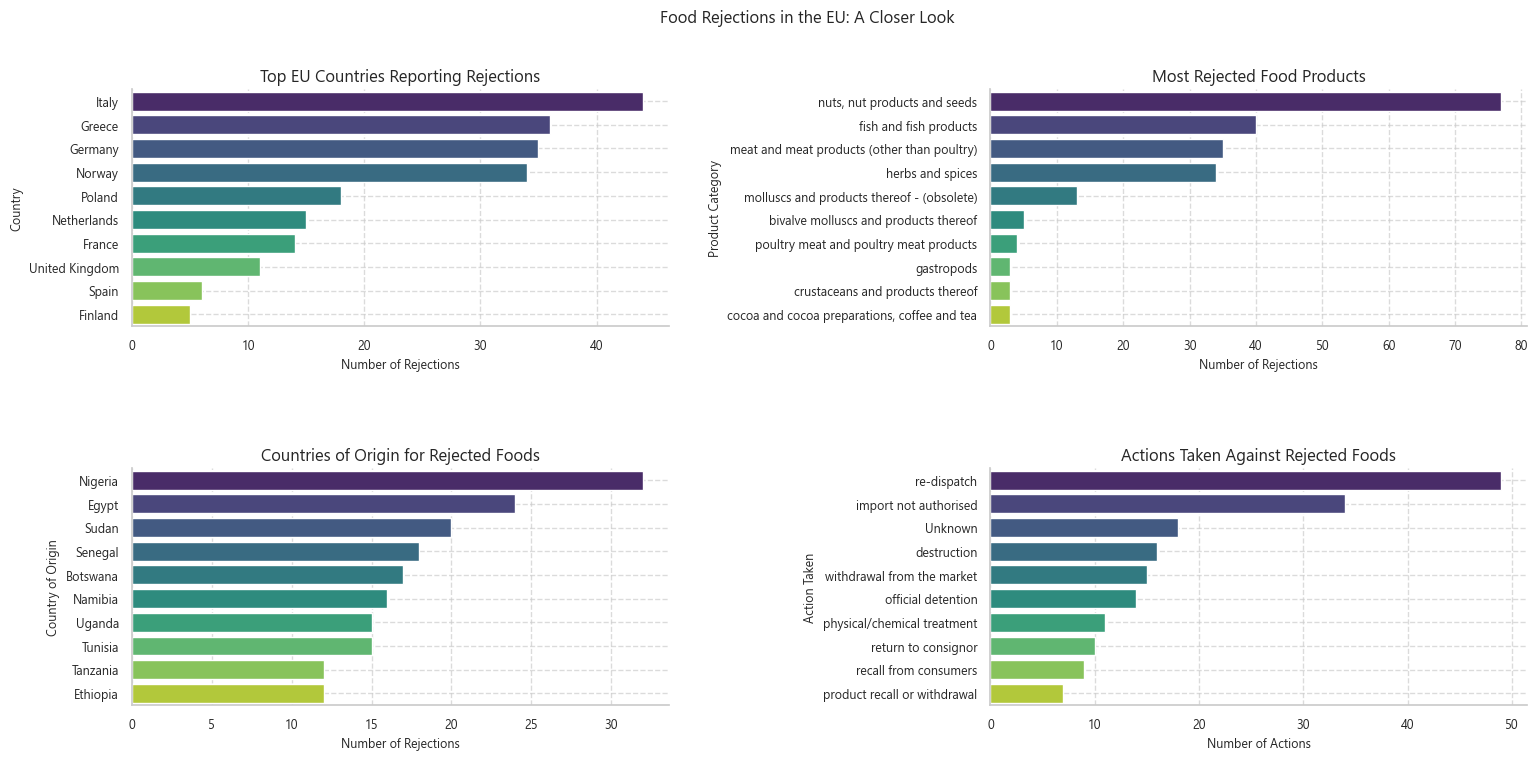

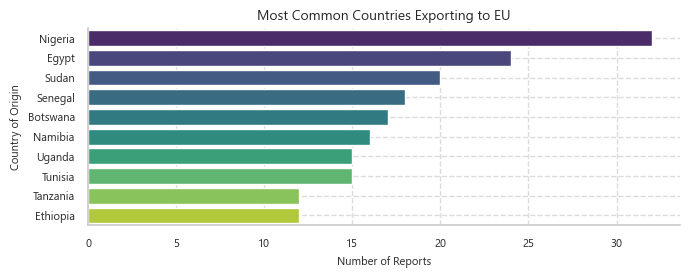

In [10]:
# Set up Seaborn aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "Segoe UI"
plt.rcParams["font.size"] = 10

# Let's visualize these insights
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
fig.suptitle("Food Rejections in the EU: A Closer Look")
plt.subplots_adjust(wspace=0.6, hspace=0.6)  # Increase spacing between subplots

for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

# Plotting key insights using Seaborn
sns.barplot(y=most_reporting_countries.index, x=most_reporting_countries.values, ax=axes[0, 0], hue=most_reporting_countries.index, legend=False, palette='viridis', dodge=False)
axes[0, 0].set_title("Top EU Countries Reporting Rejections")
axes[0, 0].set_xlabel("Number of Rejections", fontsize=9)
axes[0, 0].set_ylabel("Country", fontsize=9)
# Remove spines (outline box)
axes[0, 0].spines["top"].set_visible(False)
axes[0, 0].spines["right"].set_visible(False)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

sns.barplot(y=most_rejected_foods.index, x=most_rejected_foods.values, ax=axes[0, 1], hue=most_rejected_foods.index, legend=False, palette='viridis', dodge=False)
axes[0, 1].set_title("Most Rejected Food Products")
axes[0, 1].set_xlabel("Number of Rejections", fontsize=9)
axes[0, 1].set_ylabel("Product Category", fontsize=9)
# Remove spines (outline box)
axes[0, 1].spines["top"].set_visible(False)
axes[0, 1].spines["right"].set_visible(False)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

sns.barplot(y=most_origin_countries.index, x=most_origin_countries.values, ax=axes[1, 0], hue=most_origin_countries.index, legend=False, palette='viridis', dodge=False)
axes[1, 0].set_title("Countries of Origin for Rejected Foods")
axes[1, 0].set_xlabel("Number of Rejections", fontsize=9)
axes[1, 0].set_ylabel("Country of Origin", fontsize=9)
# Remove spines (outline box)
axes[1, 0].spines["top"].set_visible(False)
axes[1, 0].spines["right"].set_visible(False)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

sns.barplot(y=most_common_actions.index, x=most_common_actions.values, ax=axes[1, 1], hue=most_common_actions.index, legend=False, palette='viridis', dodge=False)
axes[1, 1].set_title("Actions Taken Against Rejected Foods")
axes[1, 1].set_xlabel("Number of Actions", fontsize=9)
axes[1, 1].set_ylabel("Action Taken", fontsize=9)
# Remove spines (outline box)
axes[1, 1].spines["top"].set_visible(False)
axes[1, 1].spines["right"].set_visible(False)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.figure(figsize=(7, 3))
sns.barplot(y=most_reported_origins.index, x=most_reported_origins.values, hue=most_reported_origins.index, legend=False, palette='viridis', dodge=False)
plt.title("Most Common Countries Exporting to EU", fontsize=10)
plt.xlabel("Number of Reports", fontsize=8)
plt.ylabel("Country of Origin", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# Remove spines (outline box)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.7)



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [16]:
# Display the unique values of the Risk Decision column
# Get value counts as a DataFrame
risk_counts_df = df["Risk Decision"].value_counts().reset_index()

# Rename columns
risk_counts_df.columns = ["Risk Decision", "Count"]

risk_counts_df


,Risk Decision,Count
0,undecided,125
1,serious,100
2,not serious,5


In [17]:
#pivot table for risk decision by product category
pivot_table_risk = df.pivot_table(index="Product Category", columns="Risk Decision", values="Notification Type", aggfunc="count", margins=True, margins_name="Total", observed=False)

pivot_table_risk

Risk Decision,not serious,serious,undecided,Total
Product Category,,,,
bivalve molluscs and products thereof,NaN,3.0,2.0,5
cephalopods and products thereof,NaN,NaN,2.0,2
cereals and bakery products,NaN,1.0,1.0,2
"cocoa and cocoa preparations, coffee and tea",NaN,1.0,2.0,3
confectionery,NaN,NaN,1.0,1
crustaceans and products thereof,NaN,NaN,3.0,3
"dietetic foods, food supplements, fortified foods",NaN,2.0,NaN,2
fish and fish products,2.0,NaN,38.0,40
fruits and vegetables,NaN,3.0,NaN,3


In [39]:
# Serious Risk Decisions
serious_risk_decisions = df[df["Risk Decision"] == "serious"]

# Minor Risk Decisions
minor_risk_decisions = df[df["Risk Decision"] == "not serious"]

# Undecided Risk Decisions
undecided_risk_decisions = df[df["Risk Decision"] == "undecided"]

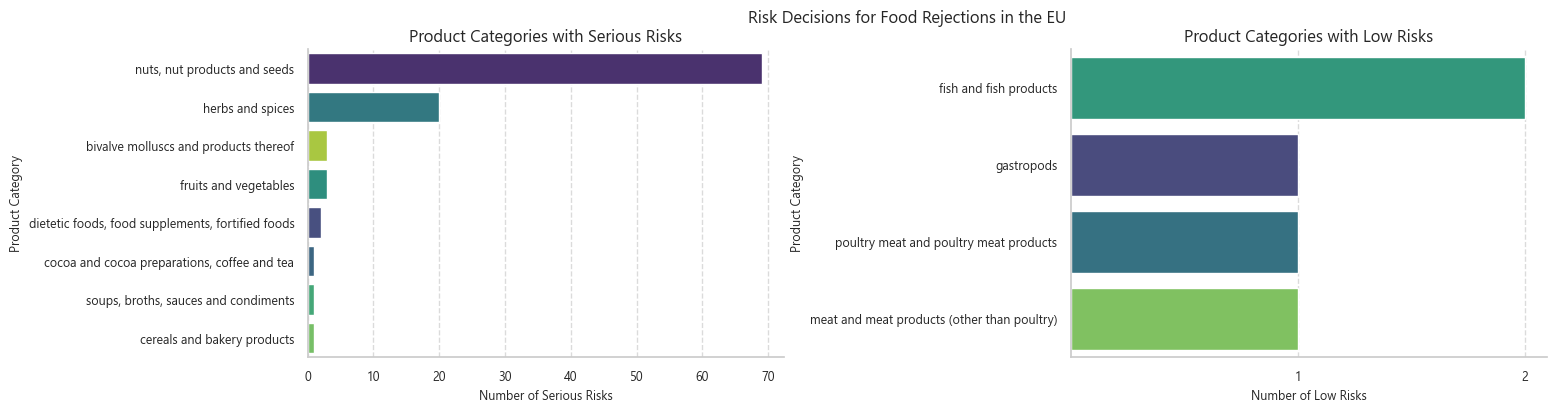

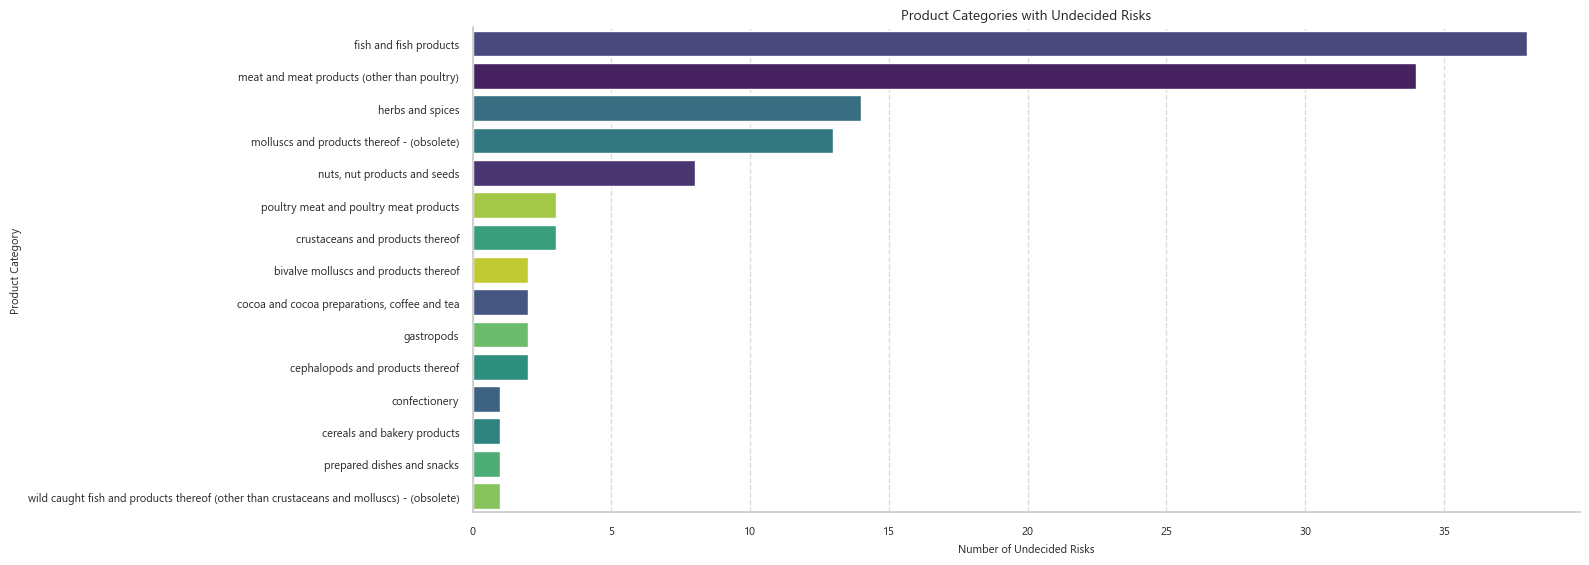

In [44]:
#lets visualize the risk decisions
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle("Risk Decisions for Food Rejections in the EU")
plt.subplots_adjust(wspace=0.6)  # Increase spacing between subplots

for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

# Plotting risk decisions using Seaborn
sns.countplot(y="Product Category", data=serious_risk_decisions, ax=axes[0], legend=False, palette='viridis', dodge=False, order=serious_risk_decisions["Product Category"].value_counts().index, hue=serious_risk_decisions["Product Category"])
axes[0].set_title("Product Categories with Serious Risks")
axes[0].set_xlabel("Number of Serious Risks", fontsize=9)
axes[0].set_ylabel("Product Category", fontsize=9)
# Remove spines (outline box)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

sns.countplot(y="Product Category", data=minor_risk_decisions, ax=axes[1], legend=False, palette='viridis', dodge=False, order=minor_risk_decisions["Product Category"].value_counts().index, hue=minor_risk_decisions["Product Category"])
axes[1].set_title("Product Categories with Low Risks")
axes[1].set_xlabel("Number of Low Risks", fontsize=9)
axes[1].set_ylabel("Product Category", fontsize=9)
# Set only specific y-ticks (1 and 2)
axes[1].set_xticks([1, 2])
axes[1].set_xticklabels(["1", "2"])

# Remove spines (outline box)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

#plot for undecided risk decisions
plt.figure(figsize=(16, 6))
sns.countplot(y="Product Category", data=undecided_risk_decisions, palette='viridis', dodge=False, order=undecided_risk_decisions["Product Category"].value_counts().index, hue=undecided_risk_decisions["Product Category"])
plt.title("Product Categories with Undecided Risks", fontsize=10)
plt.xlabel("Number of Undecided Risks", fontsize=8)
plt.ylabel("Product Category", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# Remove spines (outline box)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [46]:
#pivot table for risk decisions by country of origin
pivot_table_country_risk = df.pivot_table(index="Country of Origin", columns="Risk Decision", values="Notification Type", aggfunc="count", margins=True, margins_name="Total", observed=False)

pivot_table_country_risk

Risk Decision,not serious,serious,undecided,Total
Country of Origin,,,,
Botswana,NaN,NaN,17.0,17
Burkina Faso,NaN,5.0,3.0,8
Chad,NaN,1.0,NaN,1
Cote d'Ivoire,NaN,1.0,5.0,6
Egypt,NaN,12.0,12.0,24
Eswatini,NaN,NaN,1.0,1
Ethiopia,NaN,10.0,2.0,12
Ghana,NaN,1.0,2.0,3
Guinea,NaN,NaN,3.0,3


In [91]:
# Get the top 10 most common "Country of Origin" values as a list
top_rejected_countries = df["Country of Origin"].value_counts(12).index.tolist()

# Filter the DataFrame to include only the top 10 countries where risk decision == undecided
top_rejected_countries_undecided = df[df["Country of Origin"].isin(top_rejected_countries) & (df["Risk Decision"] == "undecided")]

# Filter the DataFrame to include only the top 10 countries where risk decision == serious
top_rejected_countries_serious = df[df["Country of Origin"].isin(top_rejected_countries) & (df["Risk Decision"] == "serious")]

# Filter the DataFrame to include only the top 10 countries where risk decision == not serious
top_rejected_countries_minor = df[df["Country of Origin"].isin(top_rejected_countries) & (df["Risk Decision"] == "not serious")]

#pivot table for product category by country of origin and risk decision
pivot_table_top_undecided_risk_category = top_rejected_countries_undecided.pivot_table(index="Product Category", columns="Country of Origin", values="Notification Type", aggfunc="count", margins=True, margins_name="Total", observed=False)
pivot_table_top_serious_risk_category = top_rejected_countries_serious.pivot_table(index="Product Category", columns="Country of Origin", values="Notification Type", aggfunc="count", margins=True, margins_name="Total", observed=False)
pivot_table_top_minor_risk_category = top_rejected_countries_minor.pivot_table(index="Product Category", columns="Country of Origin", values="Notification Type", aggfunc="count", margins=True, margins_name="Total", observed=False)



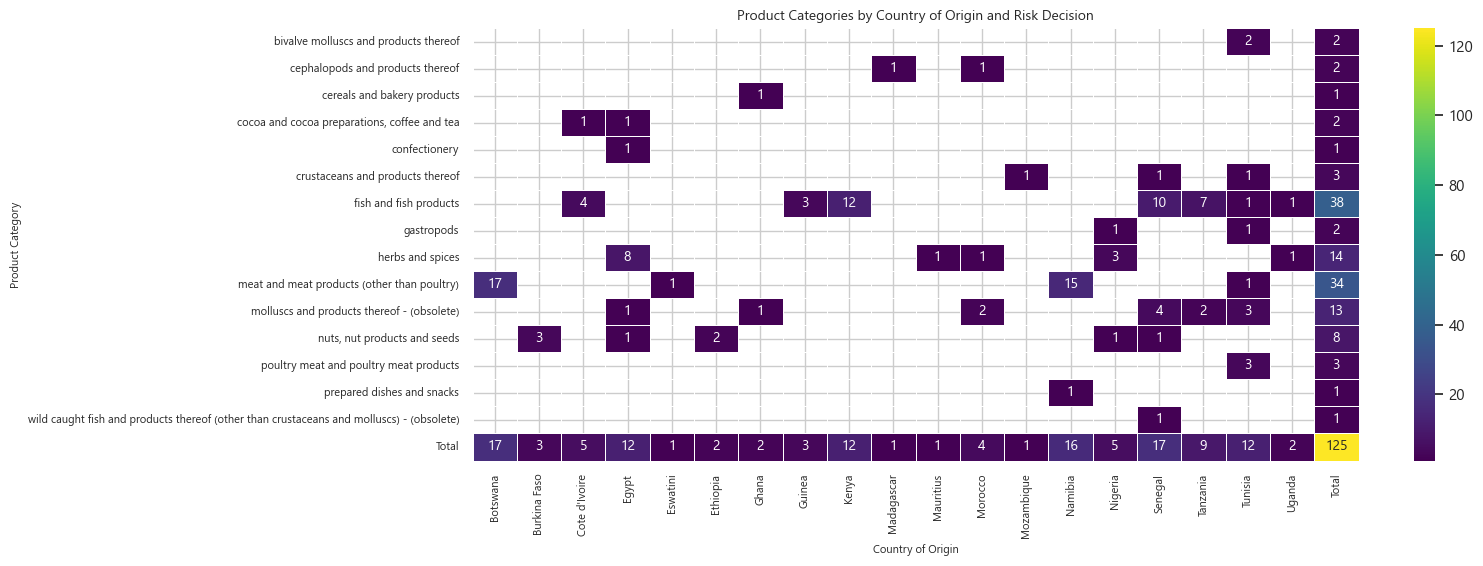

In [88]:
#visualize the pivot table for product category by country of origin and risk decision
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table_top_undecided_risk_category, cmap="viridis", annot=True, fmt="g", linewidths=0.5)
plt.title("Product Categories by Country of Origin and Risk Decision", fontsize=10)
plt.xlabel("Country of Origin", fontsize=8)
plt.ylabel("Product Category", fontsize=8)  
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

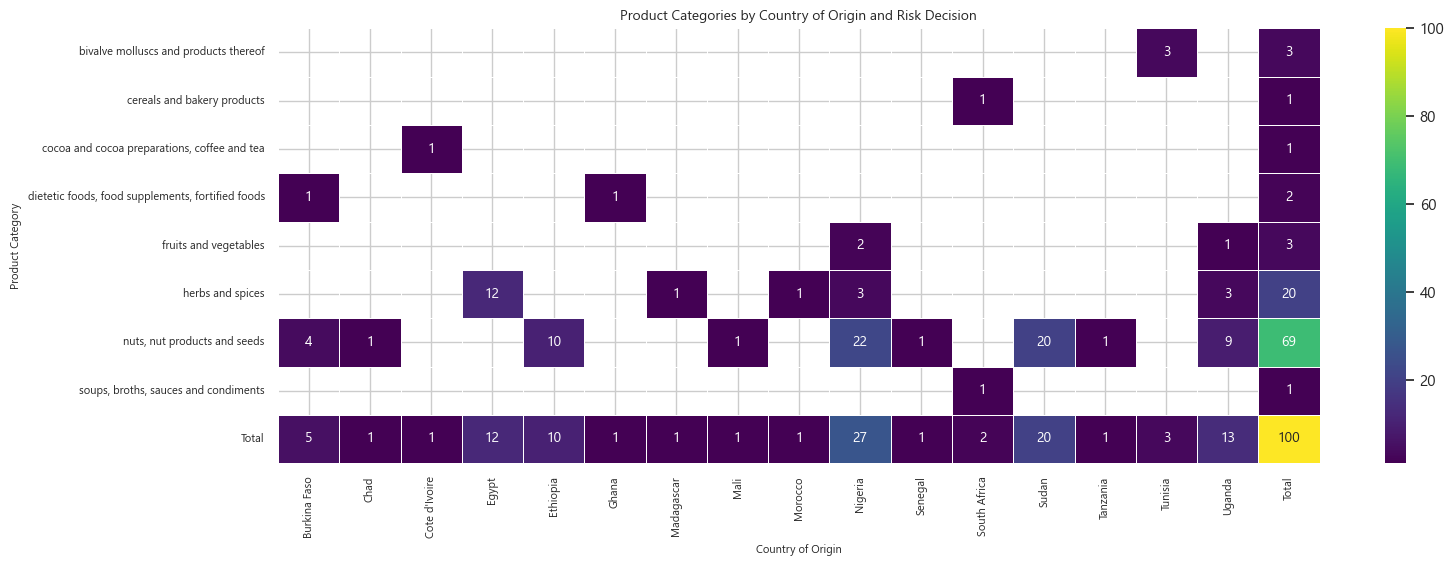

In [89]:
#visualize the pivot table for product category by country of origin and risk decision
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table_top_serious_risk_category, cmap="viridis", annot=True, fmt="g", linewidths=0.5)
plt.title("Product Categories by Country of Origin and Risk Decision", fontsize=10)
plt.xlabel("Country of Origin", fontsize=8)
plt.ylabel("Product Category", fontsize=8)  
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

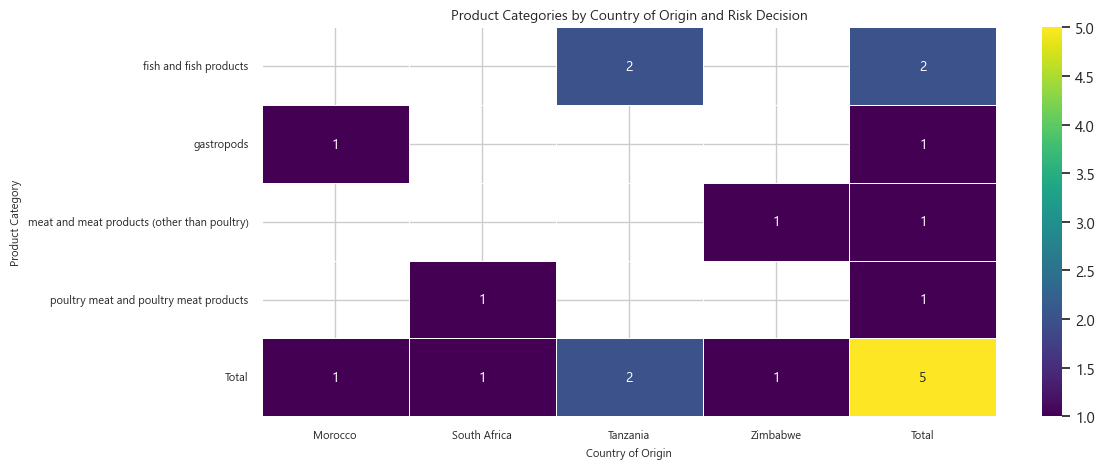

In [93]:
#visualize the pivot table for product category by country of origin and risk decision
plt.figure(figsize=(12, 5))
sns.heatmap(pivot_table_top_minor_risk_category, cmap="viridis", annot=True, fmt="g", linewidths=0.5)
plt.title("Product Categories by Country of Origin and Risk Decision", fontsize=10)
plt.xlabel("Country of Origin", fontsize=8)
plt.ylabel("Product Category", fontsize=8)  
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [50]:
#countries with not serious and undecided risk decisions
#countries with not serious risk decisions
not_serious_risk_countries = df[df["Risk Decision"] == "not serious"]
#countries with undecided risk decisions
undecided_risk_countries = df[df["Risk Decision"] == "undecided"]

not_serious_risk_countries["Country of Origin"].value_counts()
undecided_risk_countries["Country of Origin"].value_counts()

#let's merge the two dataframes
risk_countries = pd.merge(not_serious_risk_countries["Country of Origin"].value_counts(), undecided_risk_countries["Country of Origin"].value_counts(), left_index=True, right_index=True, how="outer")
risk_countries.columns = ["Not Serious Risks", "Undecided Risks"]
risk_countries = risk_countries.fillna(0).astype(int)
#risk_countries

#display only rows with not serious risks in risk_countries
merged_not_serious_undecided = risk_countries[risk_countries["Not Serious Risks"] > 0]
merged_not_serious_undecided


,Not Serious Risks,Undecided Risks
Country of Origin,,
Morocco,1,4
South Africa,1,0
Tanzania,2,9
Zimbabwe,1,0


### Key insights from the analysis of food products by risk decision:

1. Most Common Risk Decisions
    - The majority of food products are classified as “Undecided” in risk decision reports.
    - Some products have received “Serious” or “High” risk classifications, indicating a higher chance of rejection or regulatory scrutiny.

2. High-Risk Food Products:
    - Certain categories, such as nut and spices products, tend to have higher risk decisions.
    - These products often have allergy concerns, non-compliance with EU food safety standards, or labeling issues.

3. Low-Risk Food Products:
    - These products are less likely to be rejected, making them a safer bet for HiCi Ltd. However, country of origin should be taken into consideration, as there may be low risk products also classified as "Undecided". Fish products from Tanzania would have to be given more scrutiny as it falls into this category of low risk and undecided


### Recommendations for HiCi Ltd:

1. Prioritize exporting low-risk food products from countries that do not have similar products classified as "Undecided" Risk, to ensure easier compliance with EU regulations.
2. Improve quality control measures for high-risk products, and from countries with high propensity for rejection (e.g., stricter safety checks, better documentation).
3. Stay updated on EU food safety regulations to anticipate changes and minimize rejection risks.